## EDA
# Step - 1: Import the libraries


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import sklearn
import matplotlib.pyplot as plt


# Step - 2: Get the data

In [36]:
df=pd.read_csv(r'C:\Users\NSharma\Documents\datascience\HousingProject\dataset\housing.csv')

In [37]:
df.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [38]:
df.dtypes


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
df.shape

(20640, 10)

In [41]:
df.size

206400

In [42]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [43]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


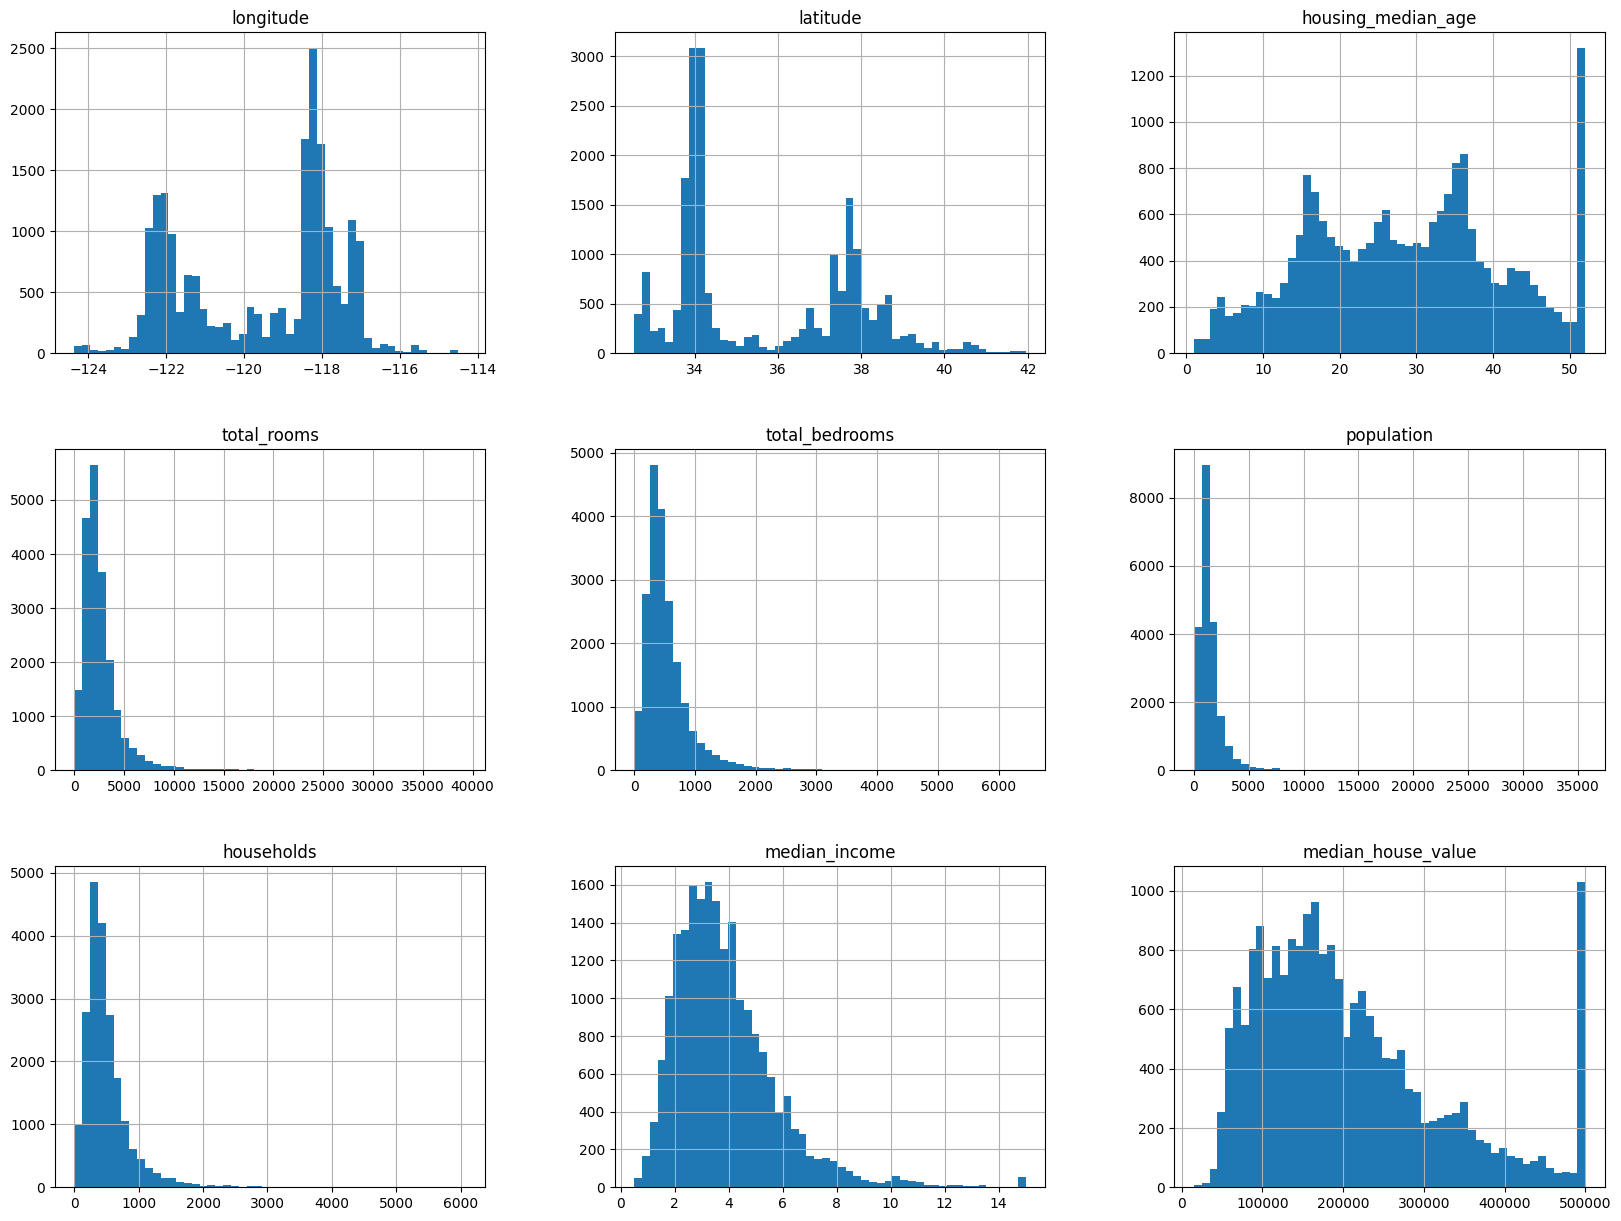

In [44]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Insights:
1. There is only one categoerical variable: ocean_proximity
2. Total 10 features present
3. PROBLEM STATEMENT: To predict district's median housing price
4. Regression problem
5. Supervised learning approach
6. Proposed approach:
    Group data by districts and then see
7. total_bedroom feature has missing values
8. Target attribute is median_house_value which seems capped to 50000
9. median_income is not expressed in dollars
10. Many histograms are tail heavy, need to transform attributes to get more bell shaped distributions
    Unlike the bell curve with a "normal distribution," heavy-tailed distributions approach zero at a slower rate and can have outliers with very high values. ML models fit well on bell shaped distributions.
 

# Step - 3: Train Test split data

To avoid data snooping bias,let's put aside 20% data as test set

In [45]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


# Step - 4: Explore the data

Make a copy of train_set.

In [46]:
df = train_set.copy()

In [47]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


# Insight: Check missing values
1. total_bedrooms feature might have missing values. Let's check all!
2. Datatypes are fine

In [49]:
missing_data = df.isnull()
missing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,False,False,False,False,False,False,False,False,False,False
8267,False,False,False,False,False,False,False,False,False,False
17445,False,False,False,False,False,False,False,False,False,False
14265,False,False,False,False,False,False,False,False,False,False
2271,False,False,False,False,False,False,False,False,False,False


In [50]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

longitude
longitude
False    16512
Name: count, dtype: int64

latitude
latitude
False    16512
Name: count, dtype: int64

housing_median_age
housing_median_age
False    16512
Name: count, dtype: int64

total_rooms
total_rooms
False    16512
Name: count, dtype: int64

total_bedrooms
total_bedrooms
False    16349
True       163
Name: count, dtype: int64

population
population
False    16512
Name: count, dtype: int64

households
households
False    16512
Name: count, dtype: int64

median_income
median_income
False    16512
Name: count, dtype: int64

median_house_value
median_house_value
False    16512
Name: count, dtype: int64

ocean_proximity
ocean_proximity
False    16512
Name: count, dtype: int64



# Insight:
Confirmed missing values in total_bedrooms feature. Let's fix it.

In [51]:
df['total_bedrooms'].describe()

count    16349.000000
mean       538.923420
std        418.202807
min          1.000000
25%        296.000000
50%        437.000000
75%        648.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [52]:
df['total_bedrooms'].value_counts().idxmax()

280.0

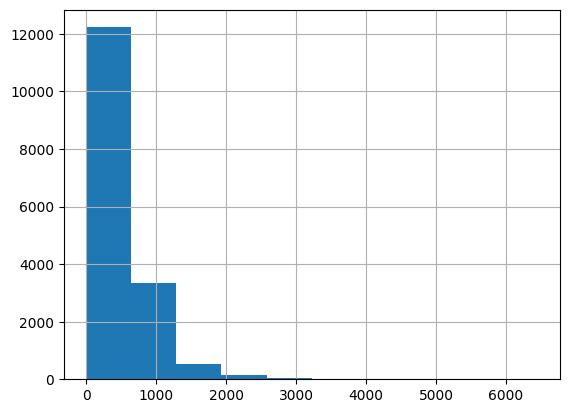

In [53]:
df['total_bedrooms'].hist()
plt.show()

# Insight:

Replace missing values by 280 seems fine.
Though we can also see if missing vaues be according to locations

In [54]:
df['total_bedrooms'].replace(np.nan,280, inplace=True)


In [55]:
df['total_bedrooms'].info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 14196 to 15795
Series name: total_bedrooms
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


Now, let's explore more about each feature

Geographical data

<Axes: xlabel='longitude', ylabel='latitude'>

<Figure size 640x480 with 0 Axes>

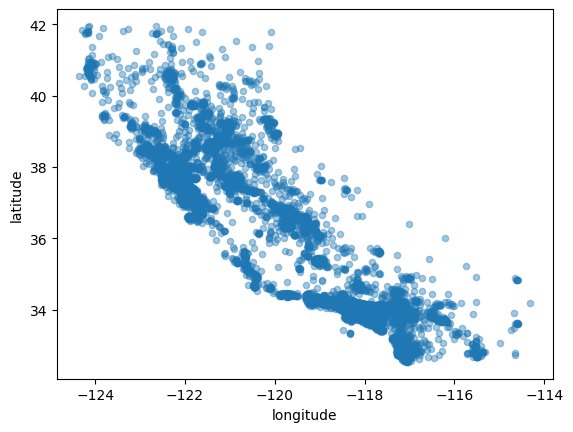

In [56]:
%matplotlib inline
fig = plt.figure()
df.plot(kind='scatter',x='longitude',y='latitude', alpha=0.4)

<Axes: xlabel='longitude', ylabel='latitude'>

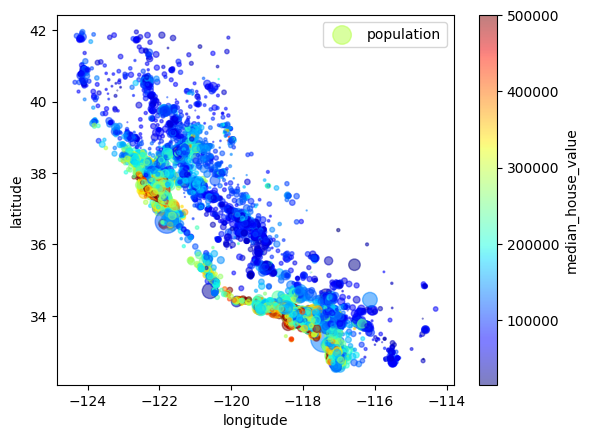

In [57]:
df.plot(kind='scatter',x='longitude',y='latitude', alpha=0.5,s=df['population']/100,label='population',
c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)

Let's put this on map to get some idea about what features are affecting the target variable

In [58]:
lat = df['latitude'].value_counts().idxmax()

In [59]:
long = df['longitude'].value_counts().idxmax()

In [60]:
#comment out due to space issue
'''import folium
loc_map = folium.Map(location=[lat,long],zoom_start=4,
tiles='Stamen Toner')
loc_map'''

"import folium\nloc_map = folium.Map(location=[lat,long],zoom_start=4,\ntiles='Stamen Toner')\nloc_map"

In [61]:
#comment out due to space issue

'''for i in range(0,len(df)):
    folium.CircleMarker(location=[df.iloc[i]['latitude'],df.iloc[i]['longitude']],
                popup=df.iloc[i]['median_house_value'],radius=0.5,color='yellow').add_to(loc_map)
    
loc_map'''

"for i in range(0,len(df)):\n    folium.CircleMarker(location=[df.iloc[i]['latitude'],df.iloc[i]['longitude']],\n                popup=df.iloc[i]['median_house_value'],radius=0.5,color='yellow').add_to(loc_map)\n    \nloc_map"

# Insights:
1. Population density at coastal areas is high.
2. Combining scatter plot and map, we can see coastal areas have high median_house_value

Let's see correlations

In [63]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [68]:
columns = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

for col in columns:
    print(f"{col}:{df[col].corr(df['median_house_value'])}")
    print("")

longitude:-0.043603312322226466

latitude:-0.1463235068658005

housing_median_age:0.10471367997427641

total_rooms:0.13406044966880729

total_bedrooms:0.05012976801594227

population:-0.025820182763413742

households:0.06579797030363868

median_income:0.687013221969691

median_house_value:1.0



# Insights:
1. median_income is highly correlated
2. coefficient near to zero indicates non linear relationship

Let's plot scatter plots and see

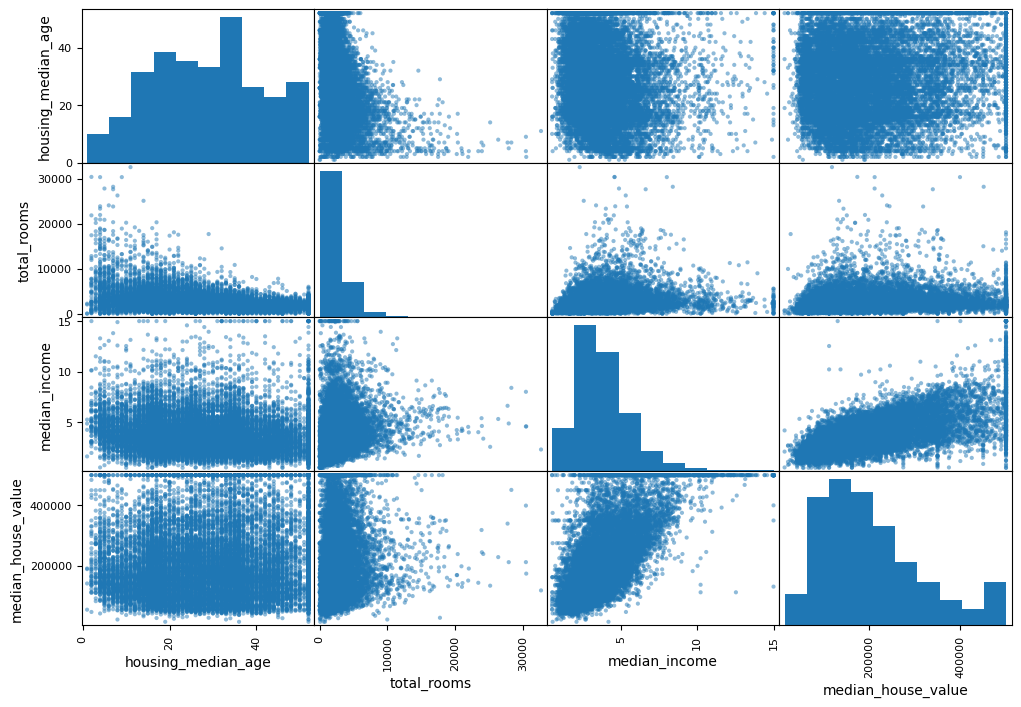

In [89]:
from pandas.plotting import scatter_matrix

features=['housing_median_age','total_rooms',
       'median_income','median_house_value']
scatter_matrix(df[features], figsize=(12,8))
    
plt.show()


# Insights:
1. Data is capped 
2. median_income need to be explored more
3. With rest variables, it might have non linear relations

Let's scatter plot for median income

<Axes: xlabel='median_income', ylabel='median_house_value'>

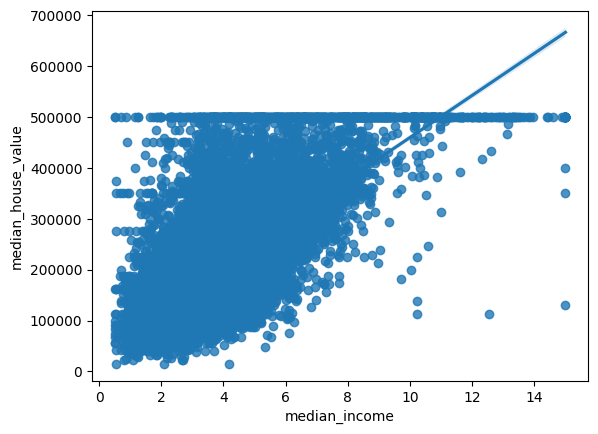

In [92]:
sns.regplot(x='median_income',y='median_house_value',data = df)

Let's plot scatter for better visual

<Axes: xlabel='median_income', ylabel='median_house_value'>

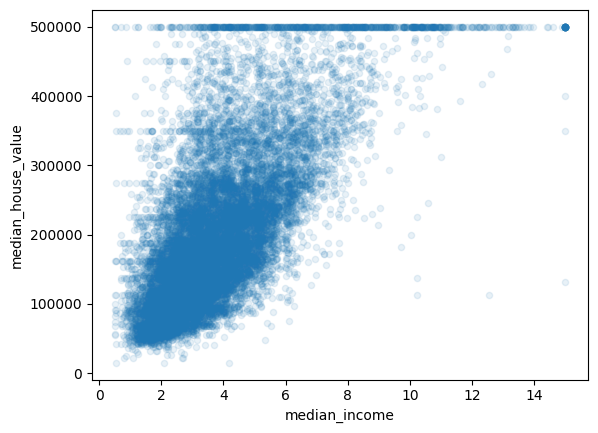

In [94]:
df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

# Insights:
1. Lots of outliers
2. Lots of straight line
3. Above needs to be handled
4. Let's try relating some attribute combinations with target variable


In [95]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')